<a href="https://colab.research.google.com/github/josimardtm/MIEL/blob/main/Tutorial01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1 para el uso de Pandapower en el Curso de Microrredes Eléctricas 2025-1

In [ ]:
# Instalación de Pandapower con todas las dependencias necesarias
!pip install pandapower[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [ ]:
import pandapower as pp #import pandapower

net = pp.create_empty_network() #create an empty network

In [ ]:
bus1 = pp.create_bus(net, name="HV Busbar", vn_kv=110, type="b")
bus2 = pp.create_bus(net, name="HV Busbar 2", vn_kv=110, type="b")
bus3 = pp.create_bus(net, name="HV Transformer Bus", vn_kv=110, type="n")
bus4 = pp.create_bus(net, name="MV Transformer Bus", vn_kv=20, type="n")
bus5 = pp.create_bus(net, name="MV Main Bus", vn_kv=20, type="b")
bus6 = pp.create_bus(net, name="MV Bus 1", vn_kv=20, type="b")
bus7 = pp.create_bus(net, name="MV Bus 2", vn_kv=20, type="b")

In [ ]:
net.bus

,name,vn_kv,type,zone,in_service
0,HV Busbar,110.0,b,None,True
1,HV Busbar 2,110.0,b,None,True
2,HV Transformer Bus,110.0,n,None,True
3,MV Transformer Bus,20.0,n,None,True
4,MV Main Bus,20.0,b,None,True
5,MV Bus 1,20.0,b,None,True
6,MV Bus 2,20.0,b,None,True


In [ ]:
pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # Create an external grid connection

net.ext_grid #show external grid table

,name,bus,vm_pu,va_degree,slack_weight,in_service
0,None,0,1.02,50.0,1.0,True


In [ ]:
trafo1 = pp.create_transformer(net, bus3, bus4, name="110kV/20kV transformer", std_type="25 MVA 110/20 kV")

In [ ]:
net.trafo


,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,i0_percent,shift_degree,tap_side,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service
0,110kV/20kV transformer,25 MVA 110/20 kV,2,3,25.0,110.0,20.0,12.0,0.41,14.0,0.07,150.0,hv,0,-9,9,1.5,0.0,0,False,1,1.0,True


In [ ]:
line1 = pp.create_line(net, bus1, bus2, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1")
line2 = pp.create_line(net, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net, bus6, bus7, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net, bus7, bus5, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")

In [ ]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Line 1,N2XS(FL)2Y 1x300 RM/35 64/110 kV,0,1,10.0,0.0600,0.144,144.0,0.0,0.588,1.0,1,cs,True
1,Line 2,NA2XS2Y 1x240 RM/25 12/20 kV,4,5,2.0,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True
2,Line 3,48-AL1/8-ST1A 20.0,5,6,3.5,0.5939,0.372,9.5,0.0,0.210,1.0,1,ol,True
3,Line 4,NA2XS2Y 1x240 RM/25 12/20 kV,6,4,2.5,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True


In [ ]:
sw1 = pp.create_switch(net, bus2, bus3, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus4, bus5, et="b", type="CB", closed=True)

In [ ]:
sw3 = pp.create_switch(net, bus5, line2, et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net, bus6, line2, et="l", type="LBS", closed=True)
sw5 = pp.create_switch(net, bus6, line3, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net, bus7, line3, et="l", type="LBS", closed=False)
sw7 = pp.create_switch(net, bus7, line4, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net, bus5, line4, et="l", type="LBS", closed=True)

In [ ]:
net.switch

,bus,element,et,type,closed,name,z_ohm,in_ka
0,1,2,b,CB,True,None,0.0,NaN
1,3,4,b,CB,True,None,0.0,NaN
2,4,1,l,LBS,True,None,0.0,NaN
3,5,1,l,LBS,True,None,0.0,NaN
4,5,2,l,LBS,True,None,0.0,NaN
5,6,2,l,LBS,False,None,0.0,NaN
6,6,3,l,LBS,True,None,0.0,NaN
7,4,3,l,LBS,True,None,0.0,NaN


In [ ]:
pp.create_load(net, bus7, p_mw=2, q_mvar=4, scaling=0.6, name="load")

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,load,6,2.0,4.0,0.0,0.0,NaN,0.6,True,wye


In [ ]:
pp.create_load(net, bus7, p_mw=2, q_mvar=4, const_z_percent=30, const_i_percent=20, name="zip_load")

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,load,6,2.0,4.0,0.0,0.0,NaN,0.6,True,wye
1,zip_load,6,2.0,4.0,30.0,20.0,NaN,1.0,True,wye


In [ ]:
pp.create_sgen(net, bus7, p_mw=2, q_mvar=-0.5, name="static generator")

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,static generator,6,2.0,-0.5,NaN,1.0,True,wye,True


In [ ]:
pp.create_gen(net, bus6, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="generator")

net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type
0,generator,5,6.0,1.03,NaN,-3.0,3.0,1.0,False,True,0.0,None


In [ ]:
pp.create_shunt(net, bus3, q_mvar=-0.96, p_mw=0, name='Shunt')

net.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,2,Shunt,-0.96,0.0,110.0,1,1,True


In [ ]:
pp.runpp(net)

In [ ]:
net

This pandapower network includes the following parameter tables:
   - bus (7 elements)
   - load (2 elements)
   - sgen (1 element)
   - gen (1 element)
   - switch (8 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)
 and the following results tables:
   - res_bus (7 elements)
   - res_line (4 elements)
   - res_trafo (1 element)
   - res_ext_grid (1 element)
   - res_load (2 elements)
   - res_sgen (1 element)
   - res_shunt (1 element)
   - res_gen (1 element)
   - res_switch (8 elements)

In [ ]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,50.000000,4.685473,6.871526
1,1.020697,50.019706,0.000000,0.000000
2,1.020697,50.019706,0.000000,-1.000150
3,1.022545,-98.745511,0.000000,0.000000
4,1.022545,-98.745511,0.000000,0.000000
5,1.030000,-98.800869,-6.000000,-7.131442
6,1.016882,-98.502308,1.227182,6.954365


In [ ]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-4.685473e+00,-6.871526,4.687291e+00,1.176938e+00,1.818097e-03,-5.694588,0.042797,2.485123e-02,0.042797,1.020000,50.000000,1.020697,50.019706,7.278349
1,-5.949688e+00,-7.170159,6.000000e+00,7.135874e+00,5.031149e-02,-0.034284,0.263034,2.612966e-01,0.263034,1.022545,-98.745511,1.030000,-98.800869,62.478344
2,2.406274e-08,-0.004433,-2.239673e-15,-1.446492e-14,2.406274e-08,-0.004433,0.000124,4.102320e-16,0.000124,1.030000,-98.800869,1.030007,-98.801491,0.059160
3,-1.208155e+00,-6.946890,1.244313e+00,6.880776e+00,3.615826e-02,-0.066113,0.200170,1.974022e-01,0.200170,1.016882,-98.502308,1.022545,-98.745511,47.546383


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Crea un gráfico lineal usando plotly.graph_objects
fig = go.Figure(data=[go.Scatter(
    x=net.res_bus.index,  # Los números de los buses
    y=net.res_bus['vm_pu'], # Los valores de voltaje en cada bus
    mode='lines+markers',  # Muestra la línea y los marcadores
    marker=dict(size=8),  # Ajusta el tamaño de los marcadores si lo deseas
)])

# Personaliza el diseño de la gráfica
fig.update_layout(
    title="Voltaje en cada nodo",
    xaxis_title="Número de nodo",
    yaxis_title="Voltaje (p.u.)"
)

# Muestra la gráfica
fig.show()

In [ ]:
# Obtén los resultados de los buses
bus_results = net.res_bus

# Crea el gráfico de línea
fig = go.Figure(data=[go.Scatter(
    x=bus_results.index,  # Los números de los buses en el eje x
    y=bus_results['va_degree'],  # Los ángulos de voltaje en el eje y
    mode='lines+markers',  # Muestra la línea y los marcadores
    marker=dict(size=8),  # Ajusta el tamaño de los marcadores si lo deseas
)])

# Personaliza el diseño de la gráfica
fig.update_layout(
    title="Ángulo de Voltaje en cada nodo",
    xaxis_title="Número de nodo",
    yaxis_title="Ángulo de Voltaje (grados)"
)

# Muestra la gráfica
fig.show()

In [ ]:
net.switch.loc[1, "closed"] = False
net.switch

,bus,element,et,type,closed,name,z_ohm,in_ka
0,1,2,b,CB,True,None,0.0,NaN
1,3,4,b,CB,False,None,0.0,NaN
2,4,1,l,LBS,True,None,0.0,NaN
3,5,1,l,LBS,True,None,0.0,NaN
4,5,2,l,LBS,True,None,0.0,NaN
5,6,2,l,LBS,False,None,0.0,NaN
6,6,3,l,LBS,True,None,0.0,NaN
7,4,3,l,LBS,True,None,0.0,NaN


In [ ]:
pp.runpp(net)
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,50.000000,-0.015279,6.684595
1,1.020447,49.989426,0.000000,0.000000
2,1.020447,49.989426,0.000000,-0.999660
3,1.020420,-100.012448,0.000000,0.000000
4,NaN,NaN,0.000000,0.000000
5,NaN,NaN,0.000000,0.000000
6,NaN,NaN,NaN,NaN


In [ ]:
net1 = pp.create_empty_network() #create an empty network

bus1 = pp.create_bus(net1, name="MV Main Bus", vn_kv=20, type="b")
bus2 = pp.create_bus(net1, name="MV Bus 1", vn_kv=20, type="b")
bus3 = pp.create_bus(net1, name="MV Bus 2", vn_kv=20, type="b")

pp.create_ext_grid(net1, bus1, vm_pu=1.0, va_degree=0)

line2 = pp.create_line(net1, bus1, bus2, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net1, bus2, bus3, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net1, bus3, bus1, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")

sw3 = pp.create_switch(net1, bus1, line2, et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net1, bus2, line2, et="l", type="LBS", closed=True)
sw5 = pp.create_switch(net1, bus2, line3, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net1, bus3, line3, et="l", type="LBS", closed=False)
sw7 = pp.create_switch(net1, bus3, line4, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net1, bus1, line4, et="l", type="LBS", closed=True)

pp.create_load(net1, bus3, p_mw=2, q_mvar=4, scaling=0.6, name="load")
pp.create_load(net1, bus3, p_mw=2, q_mvar=4, const_z_percent=30, const_i_percent=20, name="zip_load")

pp.create_sgen(net1, bus3, p_mw=2, q_mvar=-0.5, name="static generator")
pp.create_gen(net1, bus2, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="generator")

net1

This pandapower network includes the following parameter tables:
   - bus (3 elements)
   - load (2 elements)
   - sgen (1 element)
   - gen (1 element)
   - switch (6 elements)
   - ext_grid (1 element)
   - line (3 elements)

In [ ]:
pp.runpp(net1)
net1.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,3.349641,41.175385
1,1.030000,-1.484786,-6.000000,-49.215454
2,0.994259,0.252124,1.190834,6.881667


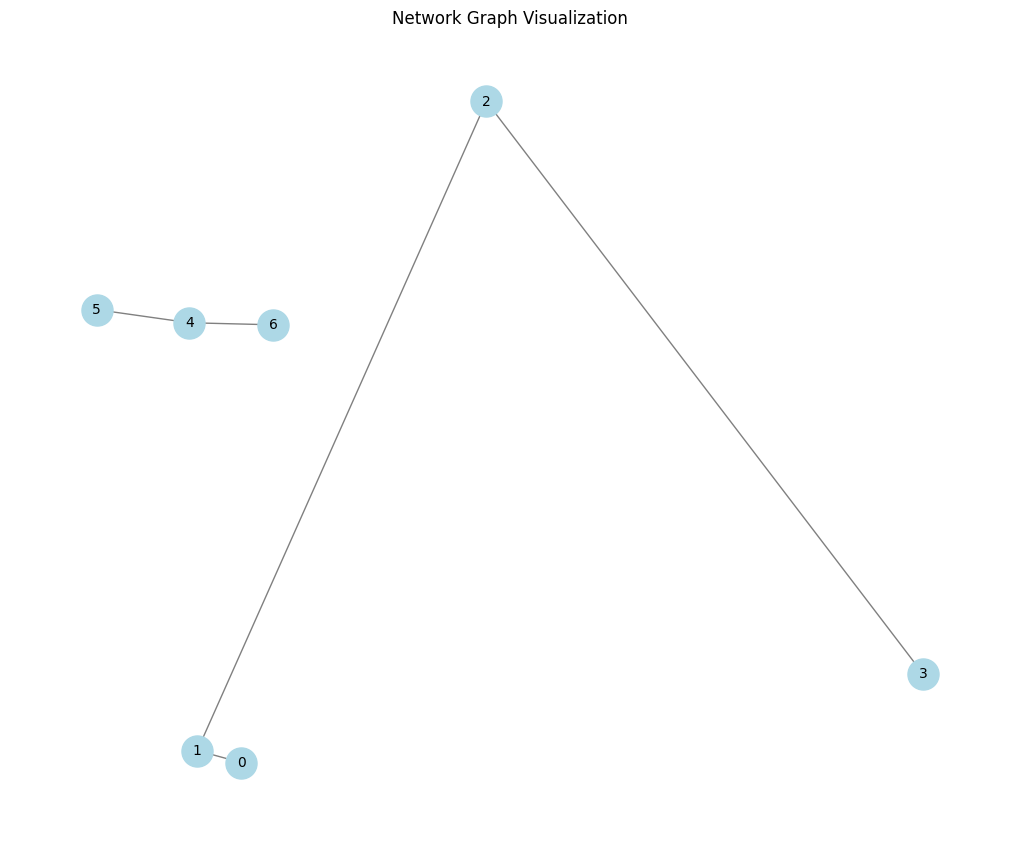

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

nx_graph= pp.topology.create_nxgraph(net)

# Visualize the NetworkX graph
pos = nx.spring_layout(nx_graph)  # Generate positions for nodes
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)
plt.title("Network Graph Visualization")
plt.show()



0.11.8


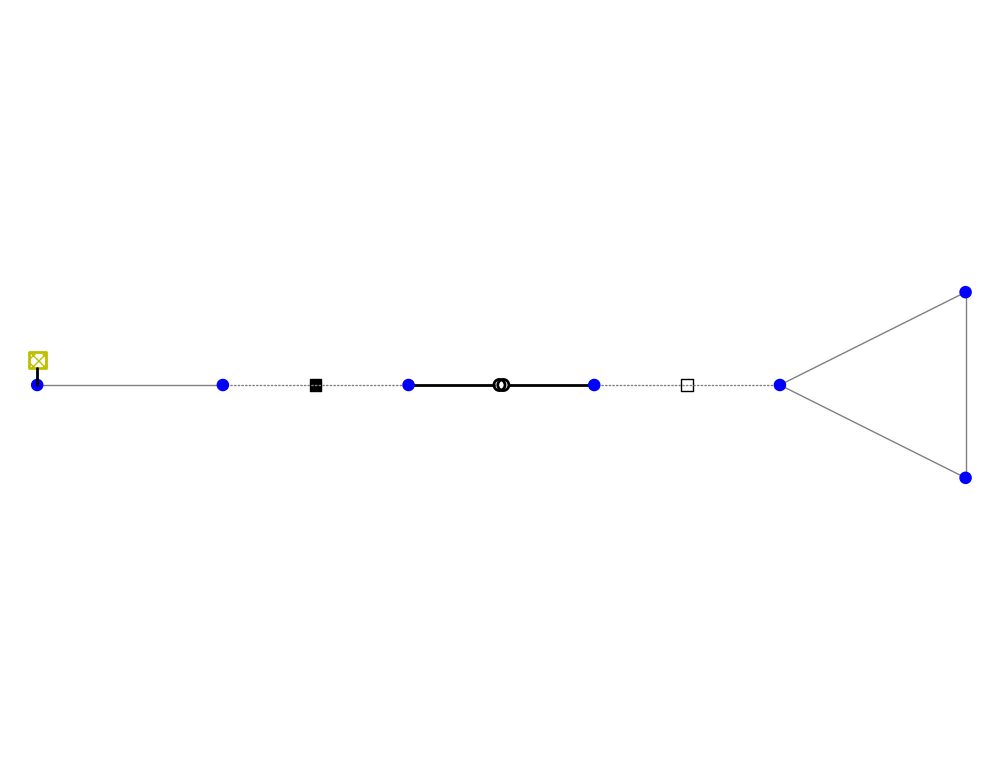

<Axes: >

In [ ]:
import pandapower.plotting as plot

import igraph
print(igraph.__version__)

plot.simple_plot(net, show_plot=True)